In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [23]:
# confirmed absolute paths
listings_path = r"C:\Users\william.shermanv\Downloads\listings.csv"
neigh_path    = r"C:\Users\william.shermanv\Downloads\neighbourhoods.csv"
reviews_path  = r"C:\Users\william.shermanv\Downloads\reviews.csv"

listings = pd.read_csv(listings_path)
neighs   = pd.read_csv(neigh_path)
reviews  = pd.read_csv(reviews_path, parse_dates=['date'])


In [29]:


# 3  price is numeric
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

# 4 include date columns
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['days_since_last_review'] = (
    pd.Timestamp('today') - listings['last_review']
).dt.days

# 5 reviewed‑derived features
rev_stats = (reviews.groupby('listing_id')['date']
             .agg(review_count='size', last_review_date='max')
             .reset_index())

listings = (listings
            .merge(rev_stats, left_on='id', right_on='listing_id', how='left')
            .merge(neighs, on='neighbourhood', how='left',
                   suffixes=('', '_lut')))

listings[['review_count','last_review_date']] = \
    listings[['review_count','last_review_date']].fillna(
        {'review_count': 0, 'last_review_date': pd.NaT}
    )

print("Listings loaded:", listings.shape)
listings.head()


Listings loaded: (37018, 23)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,listing_id,review_count,last_review_date,neighbourhood_group_lut
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,...,0.08,5,343,0,NaN,2404.0,2539.0,9.0,2018-10-19,Brooklyn
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,...,0.26,3,365,0,NaN,1063.0,2595.0,49.0,2022-06-21,Manhattan
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,216.0,...,0.03,1,37,0,NaN,638.0,5136.0,4.0,2023-08-20,Brooklyn
3,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,...,1.00,1,182,4,NaN,48.0,6848.0,195.0,2025-04-01,Brooklyn
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,...,0.03,2,83,0,NaN,1079.0,6872.0,1.0,2022-06-05,Manhattan


In [31]:
# quick summary
display(listings.describe(include='all').T.head(15))

# how many missing values per column
(listings.isna().mean()*100).sort_values(ascending=False).head(10)



,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,37018.0,NaN,NaN,NaN,437291969875553664.0,2539.0,21399995.5,50375052.5,926101349852936960.0,1410915521256009216.0,514414926711957504.0
name,37016,35355,Water View King Bed Hotel Room,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,37018.0,NaN,NaN,NaN,171420538.849965,1678.0,17682110.25,86553621.5,303664269.75,691932638.0,188865827.982895
host_name,36993,8415,Blueground,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,37018,5,Manhattan,16480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,37018,224,Bedford-Stuyvesant,2647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,37018.0,NaN,NaN,NaN,40.72857,40.500366,40.68842,40.726132,40.762271,40.912017,0.056333
longitude,37018.0,NaN,NaN,NaN,-73.947247,-74.251907,-73.98346,-73.955001,-73.928302,-73.711822,0.055007
room_type,37018,4,Entire home/apt,19924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21833.0,NaN,NaN,NaN,233.896808,8.0,90.0,150.0,268.0,20000.0,455.382022


license                   85.423308
price                     41.020585
last_review_date          31.498190
listing_id                31.498190
days_since_last_review    31.498190
last_review               31.498190
reviews_per_month         31.498190
host_name                  0.067535
name                       0.005403
id                         0.000000
dtype: float64

In [ ]:
This list shows how much data is missing in each column of your dataset. For example, the license column is missing about 85% of its values, which means most of the information is not there. The price column is missing around 41% of its data. Several other columns, like last_review_date, listing_id, and reviews_per_month, have about 31% missing values. On the other hand, columns like host_name and name have very little missing data, and the id column has no missing values at all. Knowing this helps you figure out which columns need fixing before you use the data, like filling in missing values or removing those columns.

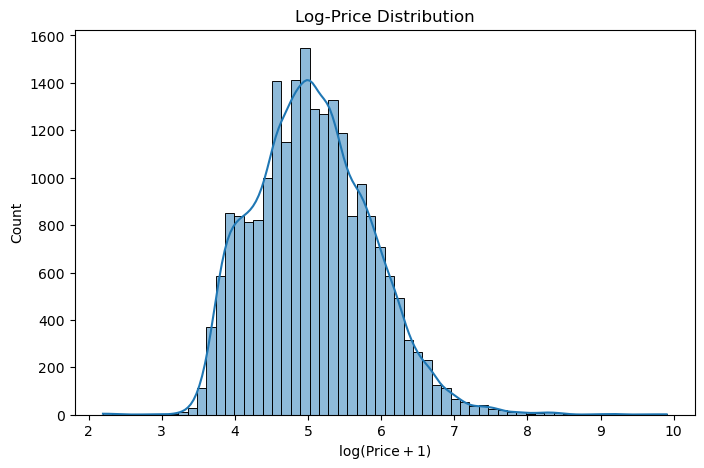

In [33]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(listings['price']), bins=60, kde=True)
plt.title("Log‑Price Distribution")
plt.xlabel("log(Price + 1)")
plt.show()


In [ ]:
the log-transformed price values around 5 (meaning log(price + 1) ≈ 5) have the highest count (frequency) in the histogram, here’s what that means:

A log price of about 5 corresponds to a price of roughly e^5 - 1, since the transformation was log(price + 1).

Calculating that:

price = 𝑒^5 − 1 ≈ 148.4

So, most listings have prices close to $148. This means the highest number of listings are priced around $148 in the data after accounting for the log transformation. The histogram is showing that price range as the most common.

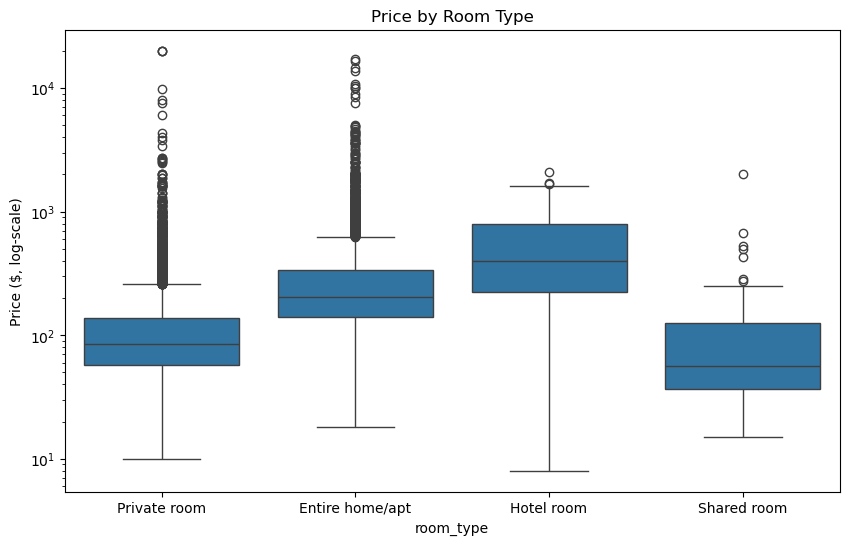

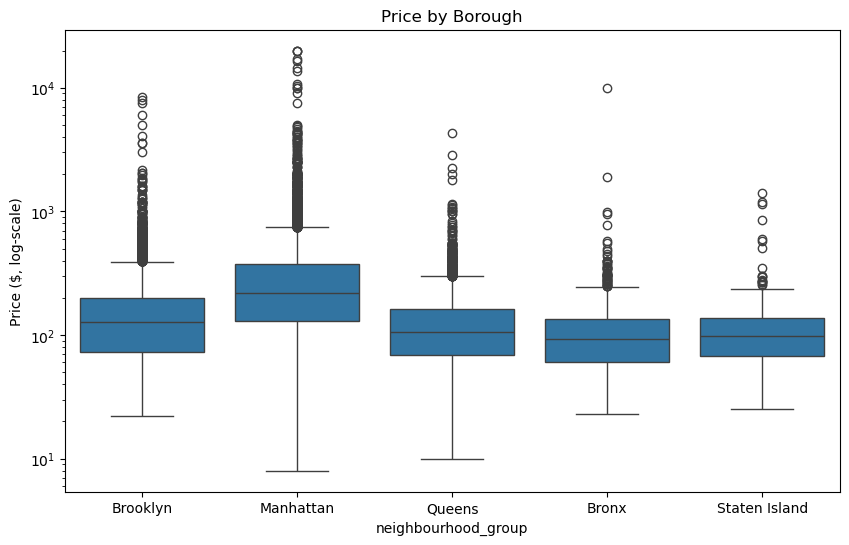

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=listings, x='room_type', y='price')
plt.yscale('log'); plt.ylabel('Price ($, log‐scale)')
plt.title('Price by Room Type')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=listings, x='neighbourhood_group', y='price')
plt.yscale('log'); plt.ylabel('Price ($, log‐scale)')
plt.title('Price by Borough')
plt.show()


In [ ]:
The box plot above shows the distribution of listing prices by room type, using a logarithmic scale for the price axis. For the “Entire home/apt” category, the median price (indicated by the black line inside the blue box) falls roughly halfway between 100 and 1000 dollars on the log scale. This means the median price is around 300 to 400 dollars. The box represents the middle 50% of prices, so most entire home or apartment listings fall within this range, while the whiskers and any points outside indicate the spread and outliers. Using the log scale helps us better visualize price differences, especially since prices vary widely across listings.



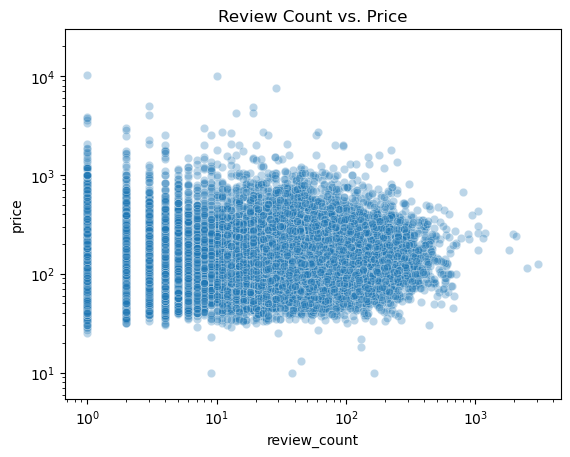

In [37]:
sns.scatterplot(data=listings, x='review_count', y='price', alpha=0.3)
plt.xscale('log'); plt.yscale('log')
plt.title('Review Count vs. Price')
plt.show()


In [ ]:
In the scatter plot, there is a noticeable horizontal line of dots around 
10^0

  (which equals 1) on the review count axis. This line stretches roughly from 
10^ 1.3 to  10^ 3.4

  on the price axis, showing many listings with just one review but prices ranging from about 20 to 2500 dollars. Similarly, there’s a second horizontal line of dots near 
10^0.2 
  (around 1.6) in review count that extends across a similar price range.

As we move down from higher review counts (around 
10^3, or 1000 reviews) toward fewer reviews (close to 1 on the log scale), and prices drop toward about 

10^ 2
  (around 100 dollars), a dense “cloud” of blue dots emerges. This indicates many listings with low review counts and prices mostly under 100 dollars.

Overall, the plot shows that many listings have very few reviews across a wide range of prices, with a concentrated group of more affordable listings having low review counts.



In [41]:
!pip install folium


In [51]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import webbrowser

# to load listings data
listings = pd.read_csv(r'C:\Users\william.shermanv\Downloads\listings.csv')

# to print first rows to check Latitude, longitude & price columns
print(listings[['latitude', 'longitude', 'price']].head())

# create base map of nyc
m = folium.Map(location=[40.74, -73.98], zoom_start=11, tiles='cartodbpositron')

# Preped heatmap data: list of (latitude, longitude, price)
heat_data = list(zip(listings['latitude'], listings['longitude'], listings['price'].fillna(0)))

# Added heatmap layer to the map
HeatMap(heat_data, radius=7, blur=8, max_zoom=12).add_to(m)

# Had to force heatmap to show in Jupyter
display(m)

# Finally saveed map to an HTML file
map_filename = "nyc_airbnb_price_heatmap.html"
m.save(map_filename)

# Open the saved map automatically in your default web browser
webbrowser.open(map_filename)


   latitude  longitude  price
0  40.64529  -73.97238    NaN
1  40.75356  -73.98559  240.0
2  40.66265  -73.99454  216.0
3  40.70935  -73.95342   96.0
4  40.80107  -73.94255   59.0


True

In [ ]:
This map shows Airbnb prices across New York City using the location of each listing. Each point on the map is a place where someone rents out their home or room. The brighter or hotter the color, the higher the price in that area. This helps us see which neighborhoods have more expensive listings and which ones are cheaper. The map is centered on New York City and uses a clear background so it’s easy to read. This way, you can easily understand how prices change depending on where the listings are.